In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

In [13]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

Rps24
Myl6
Gng13
Rps24
Gng13
Myl6
Rps24
Gng13
Myl6
Rps24
Myl6
Gng13
Rps24


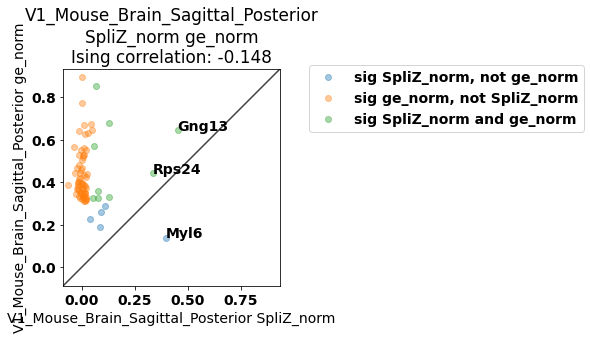

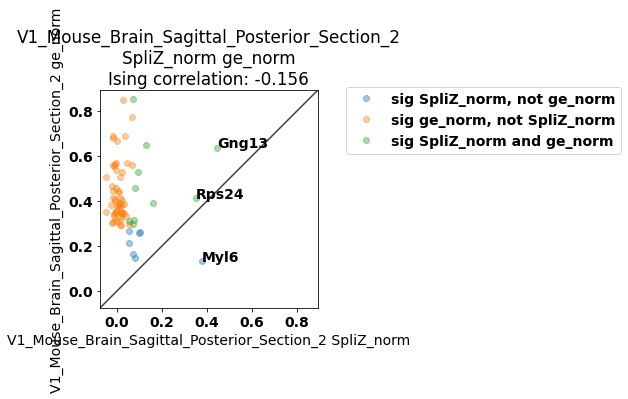

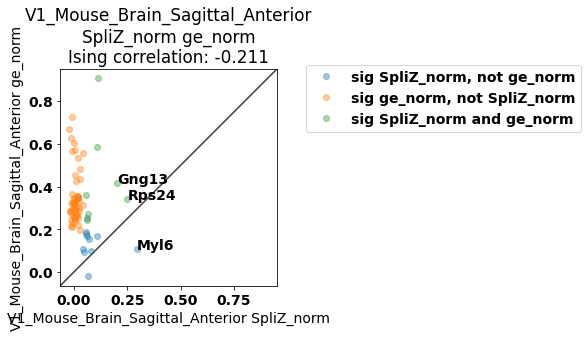

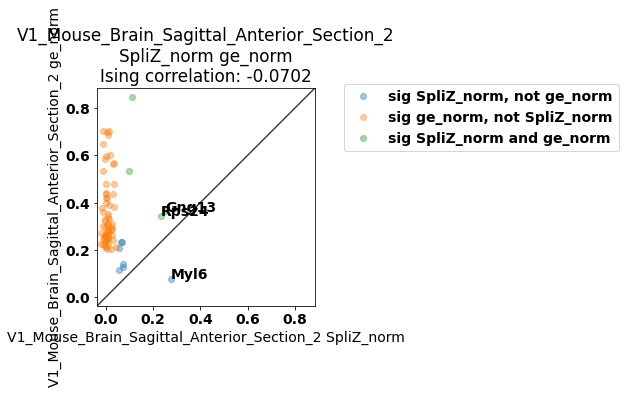

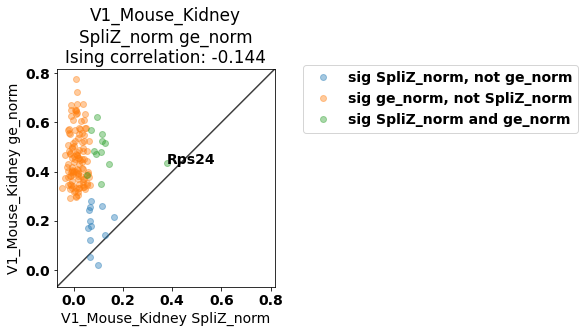

In [15]:
outpath = "/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/analyze_ising/"
samples = pd.read_csv("/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/make_samplesheet/spatial.csv",index_col = 0)

# thresh = 5
thresh = 1000

pair_thresh = 1000

# dataname1 = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# score1 = "SpliZ"
# score2 = "SpliZ"

# dataname1 = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Anterior"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# dataname1 = "p20218-s001_L1"
# dataname2 = "p20218-s001_L1"

# dataname1 = "cta_ucsf-1-5_liver"
# dataname2 = "cta_ucsf-1-5_liver"

# dataname1 = "V1_Mouse_Kidney"
# dataname2 = "V1_Mouse_Kidney"

# dataname1 = "Visium_FFPE_Human_Prostate_Cancer"
# dataname2 = "Visium_FFPE_Human_Prostate_Cancer"

# dataname1 = "Visium_FFPE_Human_Breast_Cancer"
# dataname2 = "Visium_FFPE_Human_Breast_Cancer"

# dataname1 = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"
# dataname2 = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"

# dataname1 = "Visium_FFPE_Mouse_Kidney"
# dataname2 = "Visium_FFPE_Mouse_Kidney"

# score1 = "SpliZ_norm"
# score2 = "SpliZ_resid"

# score1 = "SpliZ_norm"
# score2 = "SpliZ_norm"

# score1 = "SpliZ_resid"
# score2 = "SpliZ_resid"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_norm"

# score1 = "ReadZS"
# score2 = "ReadZS"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_resid"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_ge_norm"

score1 = "SpliZ_norm"
score2 = "ge_norm"

# score1 = "ge_norm"
# score2 = "ge_norm"

subset_sig = True


pval_col = "perm_pvals_emp_adj"
scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score1]
srow2 = scores.loc[score2]

# datanames = ['V1_Mouse_Brain_Sagittal_Posterior',
#        'V1_Mouse_Brain_Sagittal_Posterior_Section_2',
#        'V1_Mouse_Brain_Sagittal_Anterior',
#        'V1_Mouse_Brain_Sagittal_Anterior_Section_2', 'V1_Mouse_Kidney',
#        'Visium_FFPE_Human_Breast_Cancer', 'Visium_FFPE_Human_Normal_Prostate',
#        'Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma',
#        'Visium_FFPE_Human_Prostate_Cancer', 'Visium_FFPE_Human_Prostate_IF',
#        'Visium_FFPE_Mouse_Brain', 'Visium_FFPE_Mouse_Brain_IF',
#        'Visium_FFPE_Mouse_Kidney',  'p20190_s003_3_BrainMetastasis',
#        'p20190_s004_4_BrainMetastasis', 'p20218_s001_L1', 'p20218_s002_L2',
#        'p20218_s003_L3', 'p20218_s004_L4']

datanames = ['V1_Mouse_Brain_Sagittal_Posterior','V1_Mouse_Brain_Sagittal_Posterior_Section_2',
       'V1_Mouse_Brain_Sagittal_Anterior',
       'V1_Mouse_Brain_Sagittal_Anterior_Section_2', 'V1_Mouse_Kidney']

for dataname in datanames:
  try:
    dataname1 = dataname
    dataname2 = dataname

    row1 = samples.loc[ dataname1]
    row2 = samples.loc[ dataname2]
    df1 = pd.read_csv(row1[srow["ising"]],sep="\t")
  #   print(df1.shape)
    df2 = pd.read_csv(row2[srow2["ising"]],sep="\t")
  #   print(df2.shape)
    if subset_sig:
      df1["sig"] = False
      df1.loc[df1[pval_col] < 0.05,"sig"] = True
      df2["sig"] = False
      df2.loc[df2[pval_col] < 0.05,"sig"] = True



    df1 = df1.dropna()
    df2 = df2.dropna()
    df1 = df1[df1["num_pairs"] > pair_thresh]


  #   plt.hist(df1.dropna()["score_cont"])
  #   plt.title("{} {}".format(dataname1,score1))
  #   plt.savefig("{}{}_{}_hist.png".format(outpath,dataname1,score1))
  #   plt.show()

    merged = df1.merge(df2,on=srow["genecol"])
    if subset_sig:
      merged = merged[merged["sig_x"] | merged["sig_y"]]
    # merged = merged[merged["score_cont_x"] > merged["score_cont_y"]]


    fig, ax = plt.subplots()
    ax.plot(merged[merged["sig_x"] & ~(merged["sig_y"])]["score_cont_x"],merged[merged["sig_x"] & ~(merged["sig_y"])]["score_cont_y"],marker="o",linestyle="",alpha = 0.4, label="sig {}, not {}".format(score1,score2))
    ax.plot(merged[~(merged["sig_x"]) & (merged["sig_y"])]["score_cont_x"],merged[~(merged["sig_x"]) & merged["sig_y"]]["score_cont_y"],marker="o",linestyle="",alpha = 0.4, label="sig {}, not {}".format(score2,score1))
    ax.plot(merged[merged["sig_x"] & merged["sig_y"]]["score_cont_x"],merged[merged["sig_x"] & merged["sig_y"]]["score_cont_y"],marker="o",linestyle="",alpha = 0.4, label="sig {} and {}".format(score1,score2))

    ax.set_xlabel("{} {}".format(dataname1,score1))
    ax.set_ylabel("{} {}".format(dataname2,score2))

    # text_thresh = 0.05
    text_thresh1 = 0
#     text_thresh1 = 0
    text_thresh2 =0.2

    sig = []

    ax.set_title("{}\n{} {}\nIsing correlation: {:.3}".format(dataname1,score1,score2,spearmanr(merged["score_cont_x"],merged["score_cont_y"]).correlation))
    for index, row in merged.iterrows():
#       if (row["score_cont_x"] > row["score_cont_y"]) & (abs(row["score_cont_x"] > text_thresh1)):
      if (row["score_cont_x"] > text_thresh2):
#       if (abs(row["score_cont_x"]) > text_thresh1) | (abs(row["score_cont_y"]) > text_thresh2) : 
        print(row[srow["genecol"]])
        ax.text(row["score_cont_x"],row["score_cont_y"],row[srow["genecol"]],fontsize=14)
  #       print(row[srow["genecol"]])
        sig.append(row[srow["genecol"]])

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    fig.savefig("{}{}_{}_{}_{}.png".format(outpath,dataname1,dataname2,score1,score2),bbox_inches="tight")
    fig.show()
  except Exception as e:
    print(e)

In [9]:
merged[merged["gene"] == "Gng13"][["score_cont_x","score_cont_y"]]

,score_cont_x,score_cont_y
11,0.452154,0.645804


df2 /oak/stanford/groups/horence/JuliaO/visium_analysis/scripts/output/ising/V1_Mouse_Brain_Sagittal_Posterior_Section_2_ge_norm_100_100.tsv
df2 /oak/stanford/groups/horence/JuliaO/visium_analysis/scripts/output/ising/V1_Mouse_Brain_Sagittal_Anterior_Section_2_ge_norm_100_100.tsv


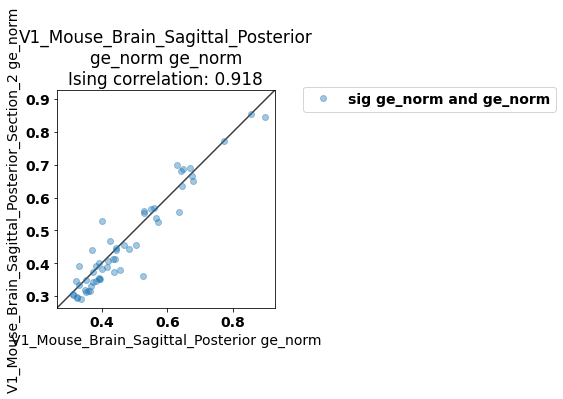

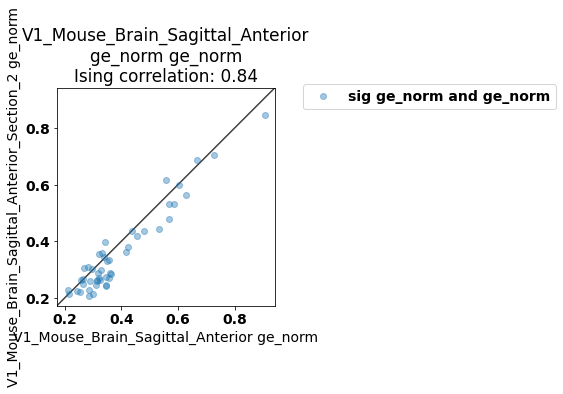

In [17]:
outpath = "/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/analyze_ising/"
samples = pd.read_csv("/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/make_samplesheet/spatial.csv",index_col = 0)

# thresh = 5
thresh = 1000

pair_thresh = 1000

# dataname1 = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# score1 = "SpliZ"
# score2 = "SpliZ"

# dataname1 = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Anterior"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# dataname1 = "p20218-s001_L1"
# dataname2 = "p20218-s001_L1"

# dataname1 = "cta_ucsf-1-5_liver"
# dataname2 = "cta_ucsf-1-5_liver"

# dataname1 = "V1_Mouse_Kidney"
# dataname2 = "V1_Mouse_Kidney"

# dataname1 = "Visium_FFPE_Human_Prostate_Cancer"
# dataname2 = "Visium_FFPE_Human_Prostate_Cancer"

# dataname1 = "Visium_FFPE_Human_Breast_Cancer"
# dataname2 = "Visium_FFPE_Human_Breast_Cancer"

# dataname1 = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"
# dataname2 = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"

# dataname1 = "Visium_FFPE_Mouse_Kidney"
# dataname2 = "Visium_FFPE_Mouse_Kidney"

# score1 = "SpliZ_norm"
# score2 = "SpliZ_resid"

# score1 = "SpliZ_norm"
# score2 = "SpliZ_norm"

# score1 = "SpliZ_resid"
# score2 = "SpliZ_resid"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_norm"

# score1 = "ReadZS"
# score2 = "ReadZS"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_resid"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_ge_norm"

# score1 = "ReadZS_ge_norm"
# score2 = "ReadZS_ge_norm"

# score1 = "SpliZ_norm"
# score2 = "ge_norm"

score1 = "ge_norm"
score2 = "ge_norm"

subset_sig = True

pval_col = "perm_pvals_emp_adj"

scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score1]
srow2 = scores.loc[score2]

datanames = ['V1_Mouse_Brain_Sagittal_Posterior',

       'V1_Mouse_Brain_Sagittal_Anterior']

for dataname in datanames:
#   try:
    dataname1 = dataname
    dataname2 = dataname + "_Section_2"

    row1 = samples.loc[ dataname1]
    row2 = samples.loc[ dataname2]
    df1 = pd.read_csv(row1[srow["ising"]],sep="\t")
  #   print(df1.shape)
    df2 = pd.read_csv(row2[srow2["ising"]],sep="\t")
    print("df2",row2[srow2["ising"]])
  #   print(df2.shape)
    if subset_sig:
      df1["sig"] = False
      df1.loc[df1[pval_col] < 0.05,"sig"] = True
      df2["sig"] = False
      df2.loc[df2[pval_col] < 0.05,"sig"] = True



    df1 = df1.dropna()
    df2 = df2.dropna()
    df1 = df1[df1["num_pairs"] > pair_thresh]


  #   plt.hist(df1.dropna()["score_cont"])
  #   plt.title("{} {}".format(dataname1,score1))
  #   plt.savefig("{}{}_{}_hist.png".format(outpath,dataname1,score1))
  #   plt.show()

    merged = df1.merge(df2,on=srow["genecol"])
    if subset_sig:
      merged = merged[merged["sig_x"] & merged["sig_y"]]
    # merged = merged[merged["score_cont_x"] > merged["score_cont_y"]]


    fig, ax = plt.subplots()
#     ax.plot(merged[merged["sig_x"] & ~(merged["sig_y"])]["score_cont_x"],merged[merged["sig_x"] & ~(merged["sig_y"])]["score_cont_y"],marker="o",linestyle="",alpha = 0.4, label="sig {}, not {}".format(score1,score2))
#     ax.plot(merged[~(merged["sig_x"]) & (merged["sig_y"])]["score_cont_x"],merged[~(merged["sig_x"]) & merged["sig_y"]]["score_cont_y"],marker="o",linestyle="",alpha = 0.4, label="sig {}, not {}".format(score2,score1))
    ax.plot(merged[merged["sig_x"] & merged["sig_y"]]["score_cont_x"],merged[merged["sig_x"] & merged["sig_y"]]["score_cont_y"],marker="o",linestyle="",alpha = 0.4, label="sig {} and {}".format(score1,score2))

    ax.set_xlabel("{} {}".format(dataname1,score1))
    ax.set_ylabel("{} {}".format(dataname2,score2))

    # text_thresh = 0.05
    text_thresh1 = .15
#     text_thresh1 = 0
    text_thresh2 =0

    sig = []

    ax.set_title("{}\n{} {}\nIsing correlation: {:.3}".format(dataname1,score1,score2,spearmanr(merged["score_cont_x"],merged["score_cont_y"]).correlation))
#     for index, row in merged.iterrows():
#       if (row["score_cont_x"] > row["score_cont_y"]) & (abs(row["score_cont_x"] > text_thresh1)):
# #       if (abs(row["score_cont_x"]) > text_thresh1) | (abs(row["score_cont_y"]) > text_thresh2) : 
#         print(row[srow["genecol"]])
#         ax.text(row["score_cont_x"],row["score_cont_y"],row[srow["genecol"]],fontsize=14)
#   #       print(row[srow["genecol"]])
#         sig.append(row[srow["genecol"]])

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    fig.savefig("{}{}_{}_{}_{}.png".format(outpath,dataname1,dataname2,score1,score2),bbox_inches="tight")
    fig.show()
#   except Exception as e:
#     print(e)

In [9]:
df2

,gene,score_cont,num_pairs,perm_pval,mean_score,perm_pvals_adj,sig
0,Rps24,0.233079,8224,0.0,2.012869e-17,0.0,False
1,Eif4a2,0.279781,55,0.0,1.571997e-17,0.0,False
2,Ptgds,0.098991,8029,0.0,-1.719055e-17,0.0,False
3,Rbfox1,0.183267,129,0.0,3.127389e-18,0.0,False
4,Atp5c1,0.056585,7745,0.0,-2.080652e-17,0.0,False
...,...,...,...,...,...,...,...
934,Il18,-0.178213,207,1.0,0.000000e+00,1.0,False
935,Spg7,-0.130693,335,1.0,0.000000e+00,1.0,False
936,Rbck1,-0.572743,9,1.0,2.829980e-17,1.0,False
937,Paip1,-0.495603,21,1.0,-8.074349e-17,1.0,False


In [11]:
merged

,window,score_cont_x,num_pairs_x,perm_pval_x,mean_score_x,perm_pvals_adj_x,sig_x,score_cont_y,num_pairs_y,perm_pval_y,mean_score_y,perm_pvals_adj_y,sig_y
0,chr19_1997_plus,0.037079,7828,0.00,-7.909567e-18,0.000000,True,0.039347,8224,0.00,1.635456e-17,0.000000,True
1,chr11_24001_plus,0.106420,6333,0.00,-4.588093e-18,0.000000,True,0.073813,6186,0.00,2.301974e-18,0.000000,True
2,chr11_1272_plus,0.039568,6151,0.00,-4.548929e-18,0.000000,True,0.013266,5648,0.19,-3.105519e-18,0.647403,False
3,chr2_5647_plus,0.044522,6202,0.00,4.546988e-18,0.000000,True,0.066718,6119,0.00,-6.782864e-18,0.000000,True
4,chr3_16833_minus,0.026492,6205,0.00,-4.529597e-18,0.000000,True,0.017402,5822,0.10,1.905145e-18,0.517533,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,chr5_24786_plus,-0.013012,4811,0.86,3.493327e-18,0.948395,False,0.044384,3870,0.00,1.537140e-17,0.000000,True
4766,chr15_5200_plus,-0.032367,1940,0.90,-1.135052e-17,0.956409,False,0.064553,1406,0.00,4.469333e-18,0.000000,True
4786,chr5_6983_plus,-0.033727,1622,0.91,-1.556842e-17,0.960760,False,0.062637,1290,0.00,-3.507121e-18,0.000000,True
4922,chr2_13951_plus,-0.040584,1740,0.96,1.409807e-17,0.983865,False,0.053247,1284,0.00,-1.387779e-17,0.000000,True


In [8]:
merged

,window,score_cont_x,num_pairs_x,perm_pval_x,mean_score_x,perm_pvals_adj_x,sig_x,score_cont_y,num_pairs_y,perm_pval_y,mean_score_y,perm_pvals_adj_y,sig_y
0,chrM_1_plus,0.306645,2930,0.00,2.756606e-18,0.0000,True,0.665406,2930,0.0,-2.205285e-18,0.0,True
1,chr2_17772_minus,0.103276,1689,0.00,-1.171739e-17,0.0000,True,0.817804,1689,0.0,-1.718551e-17,0.0,True
2,chrM_3_plus,0.018698,1548,0.19,1.660147e-17,0.2875,False,0.424374,1548,0.0,1.992176e-17,0.0,True
3,chr3_19324_minus,0.014362,1335,0.23,3.514059e-18,0.2875,False,0.634224,1335,0.0,3.514059e-18,0.0,True
4,chrM_2_plus,0.002534,2753,0.38,-1.364679e-17,0.3800,False,0.351933,2753,0.0,-1.137232e-17,0.0,True


chr14_15057_minus
chr6_5232_minus
chr14_15057_minus
chr14_15057_minus
chr6_5232_minus
chr6_5232_minus


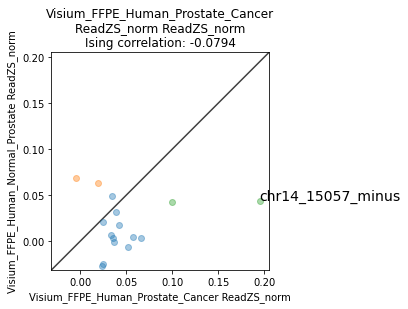

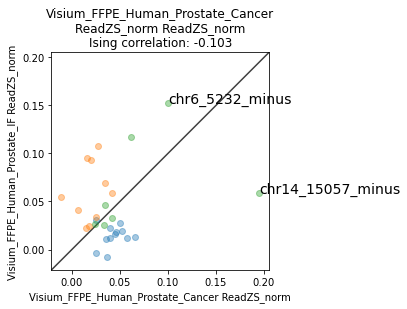

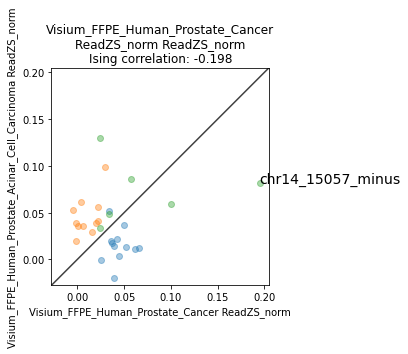

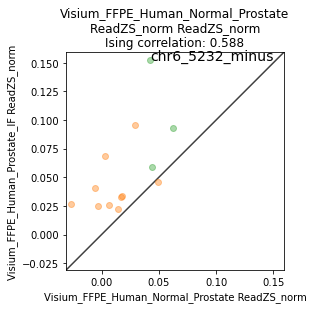

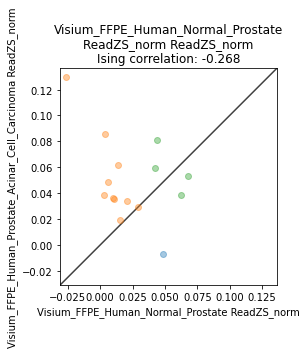

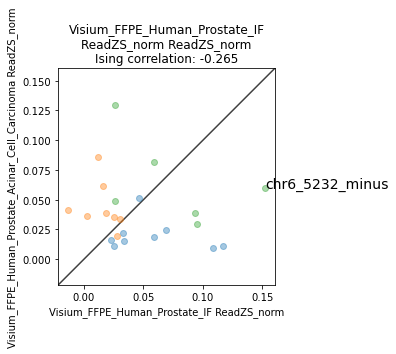

In [14]:
outpath = "/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/analyze_ising/"
samples = pd.read_csv("/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/make_samplesheet/spatial.csv",index_col = 0)

# thresh = 5
thresh = 1000

pair_thresh = 1000

# dataname1 = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# score1 = "SpliZ"
# score2 = "SpliZ"

# dataname1 = "V1_Mouse_Brain_Sagittal_Anterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Anterior"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior"

# dataname1 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
# dataname2 = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"

# dataname1 = "p20218-s001_L1"
# dataname2 = "p20218-s001_L1"

# dataname1 = "cta_ucsf-1-5_liver"
# dataname2 = "cta_ucsf-1-5_liver"

# dataname1 = "V1_Mouse_Kidney"
# dataname2 = "V1_Mouse_Kidney"

# dataname1 = "Visium_FFPE_Human_Prostate_Cancer"
# dataname2 = "Visium_FFPE_Human_Prostate_Cancer"

# dataname1 = "Visium_FFPE_Human_Breast_Cancer"
# dataname2 = "Visium_FFPE_Human_Breast_Cancer"

# dataname1 = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"
# dataname2 = "Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"

# dataname1 = "Visium_FFPE_Mouse_Kidney"
# dataname2 = "Visium_FFPE_Mouse_Kidney"

# score1 = "SpliZ_norm"
# score2 = "SpliZ_resid"

# score1 = "SpliZ_norm"
# score2 = "SpliZ_norm"

# score1 = "SpliZ_resid"
# score2 = "SpliZ_resid"

score1 = "ReadZS_norm"
score2 = "ReadZS_norm"

# score1 = "ReadZS"
# score2 = "ReadZS"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_resid"

# score1 = "ReadZS_norm"
# score2 = "ReadZS_ge_norm"

# score1 = "ReadZS_ge_norm"
# score2 = "ReadZS_ge_norm"

# score1 = "SpliZ_norm"
# score2 = "ge_norm"

# score1 = "ge_norm"
# score2 = "ge_norm"

subset_sig = True



scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score1]
srow2 = scores.loc[score2]

# datanames1 = ['V1_Mouse_Brain_Sagittal_Posterior','V1_Mouse_Brain_Sagittal_Anterior']
# datanames2 = ['V1_Mouse_Brain_Sagittal_Posterior_Section_2','V1_Mouse_Brain_Sagittal_Anterior_Section_2']

datanames = ["Visium_FFPE_Human_Prostate_Cancer","Visium_FFPE_Human_Normal_Prostate",
             "Visium_FFPE_Human_Prostate_IF","Visium_FFPE_Human_Prostate_Acinar_Cell_Carcinoma"]
datanames1 = []
datanames2 = []
for i in range(len(datanames) - 1):
  for j in range(i + 1,len(datanames)):
    datanames1.append(datanames[i])
    datanames2.append(datanames[j])
# datanames1 = ["Visium_FFPE_Human_Normal_Prostate"]
# datanames2 = []
for i in range(len(datanames1)) :
  try:
    dataname1 = datanames1[i]
    dataname2 = datanames2[i]

    row1 = samples.loc[ dataname1]
    row2 = samples.loc[ dataname2]
    df1 = pd.read_csv(row1[srow["ising"]],sep="\t")
  #   print(df1.shape)
    df2 = pd.read_csv(row2[srow2["ising"]],sep="\t")
  #   print(df2.shape)
    if subset_sig:
      df1["sig"] = False
      df1.loc[df1["perm_pvals_adj"] < 0.05,"sig"] = True
      df2["sig"] = False
      df2.loc[df2["perm_pvals_adj"] < 0.05,"sig"] = True



    df1 = df1.dropna()
    df2 = df2.dropna()
    df1 = df1[df1["num_pairs"] > pair_thresh]


  #   plt.hist(df1.dropna()["score_cont"])
  #   plt.title("{} {}".format(dataname1,score1))
  #   plt.savefig("{}{}_{}_hist.png".format(outpath,dataname1,score1))
  #   plt.show()

    merged = df1.merge(df2,on=srow["genecol"])
    if subset_sig:
      merged = merged[merged["sig_x"] | merged["sig_y"]]
    # merged = merged[merged["score_cont_x"] > merged["score_cont_y"]]


    fig, ax = plt.subplots()
    ax.plot(merged[merged["sig_x"] & ~(merged["sig_y"])]["score_cont_x"],merged[merged["sig_x"] & ~(merged["sig_y"])]["score_cont_y"],marker="o",linestyle="",alpha = 0.4)
    ax.plot(merged[~(merged["sig_x"]) & (merged["sig_y"])]["score_cont_x"],merged[~(merged["sig_x"]) & merged["sig_y"]]["score_cont_y"],marker="o",linestyle="",alpha = 0.4)
    ax.plot(merged[merged["sig_x"] & merged["sig_y"]]["score_cont_x"],merged[merged["sig_x"] & merged["sig_y"]]["score_cont_y"],marker="o",linestyle="",alpha = 0.4)

    ax.set_xlabel("{} {}".format(dataname1,score1))
    ax.set_ylabel("{} {}".format(dataname2,score2))


#     text_thresh1 = .3

#     text_thresh2 =.3
  
    text_thresh1 = .15
    text_thresh2 = .15

    sig = []

    ax.set_title("{}\n{} {}\nIsing correlation: {:.3}".format(dataname1,score1,score2,spearmanr(merged["score_cont_x"],merged["score_cont_y"]).correlation))
    for index, row in merged.iterrows():
#       if (row["score_cont_x"] > row["score_cont_y"]) & (abs(row["score_cont_x"] > text_thresh1)):
      if (abs(row["score_cont_x"]) > text_thresh1) | (abs(row["score_cont_y"]) > text_thresh2) : 
        print(row[srow["genecol"]])
        ax.text(row["score_cont_x"],row["score_cont_y"],row[srow["genecol"]],fontsize=14)
  #       print(row[srow["genecol"]])
        sig.append(row[srow["genecol"]])

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    fig.savefig("{}{}_{}_{}_{}.png".format(outpath,dataname1,dataname2,score1,score2),bbox_inches="tight")
    fig.show()
  except:
    print("missing file")